## Información de autos

La data contiene información de autos originalmente utilizada en la libreria StatLib. El archivo original se puede encontrar en https://archive.ics.uci.edu/dataset/9/auto+mpg

Algunas preguntas:
- ¿Cuáles son las marcas de autos que construyen autos más rápidos?
- ¿Cuáles son las marcas de autos que construyen autos mas económicos en gasto de combustible?
- ¿Existe alguna relación entre el consumo de combustible y el peso?
 

Documentación.
<table>
<tr><td>Columna</td><td>Descripción</td><td>Tipo</td></tr>

<tr><td>mpg</td><td>Consumo de combustible en millas por galon</td><td>Numérica y continua</td></tr>
<tr><td>cylinders</td><td>Cantidad de cilindros</td><td>Numérica y discreta</td></tr>
<tr><td>displacement</td><td>Desplazamiento del motor</td><td>Numérica y continua</td></tr>
<tr><td>horsepower</td><td>Fuerza del motor</td><td>Numérica y continua</td></tr>
<tr><td>weight</td><td>Peso en Kg.</td><td>Numérica y continua</td></tr>
<tr><td>acceleration</td><td>Aceleracion de 0 a 60 mph</td><td>Numérica y continua</td></tr>
<tr><td>model year</td><td>Año del modelo</td><td>Numérica y discreta</td></tr>
<tr><td>origin</td><td>Tipo de origen</td><td>Categorica y discreta</td></tr>
<tr><td>brand</td><td>Marca del auto</td><td>Categorica y discreta</td></tr>
<tr><td>model</td><td>Modelo del auto</td><td>Texto</td></tr>
</table>

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
url = 'https://drive.google.com/file/d/1PKNAVdZeRYgbMo_KFQQ4bs5JXnFX8Tu6/view?usp=drive_link'
#print(url.split('/')[-2])
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
#print(path)

df_autos = pd.read_csv(path, sep=',')
df_autos.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,model
245,36.1,4,98.0,66,1800,14.4,78,1,ford,fiesta
96,13.0,8,360.0,175,3821,11.0,73,1,amc,ambassador brougham
107,18.0,6,232.0,100,2789,15.0,73,1,amc,gremlin
162,15.0,6,258.0,110,3730,19.0,75,1,amc,matador
237,30.5,4,98.0,63,2051,17.0,77,1,chevrolet,chevette
348,37.7,4,89.0,62,2050,17.3,81,3,toyota,tercel
59,23.0,4,97.0,54,2254,23.5,72,2,volkswagen,type 3
391,36.0,4,135.0,84,2370,13.0,82,1,dodge,charger 2.2
55,27.0,4,97.0,60,1834,19.0,71,2,volkswagen,model 111
337,32.4,4,107.0,72,2290,17.0,80,3,honda,accord


In [3]:
df_autos.query("horsepower=='?'")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,model
32,25.0,4,98.0,?,2046,19.0,71,1,ford,pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford,maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault,lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford,mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault,18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc,concord dl


In [4]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   brand         398 non-null    object 
 9   model         396 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 31.2+ KB


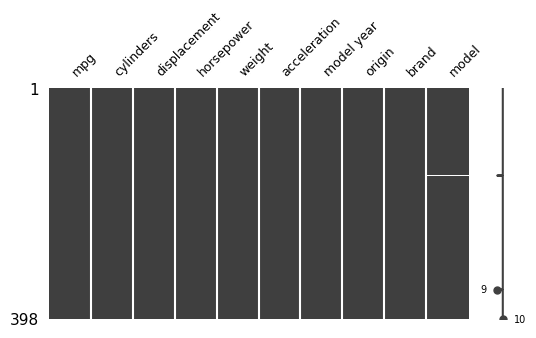

In [5]:
msno.matrix(df_autos, figsize=(6,3), fontsize=9)
plt.show()

## Tratamiento de datos

In [6]:
import numpy as np
df_autos.dropna(subset=['model'], inplace=True)
df_autos.shape
df_autos['origin'].replace({1:'USA',2:'Europe',3:'Japan'},inplace=True)
df_autos['brand'].replace({'mercedes':'mercedes-benz','vokswagen':'volkswagen',
                           'vw':'volkswagen','maxda':'mazda','toyouta':'toyota',
                           'chevroelt':'chevrolet'},inplace=True)
df_autos['horsepower'].replace({'?':np.nan},inplace=True)
df_autos.dropna(subset=['horsepower'], inplace=True)
df_autos['horsepower'] = df_autos['horsepower'].astype('int')

In [7]:
df_autos.groupby(['origin','brand']).agg({'model':'count'}).reset_index()

,origin,brand,model
0,Europe,audi,7
1,Europe,bmw,2
2,Europe,fiat,8
3,Europe,mercedes-benz,3
4,Europe,opel,4
5,Europe,peugeot,8
6,Europe,renault,3
7,Europe,saab,4
8,Europe,triumph,1
9,Europe,volkswagen,22


In [8]:
df_autos[['cylinders','acceleration']]

,cylinders,acceleration
0,8,12.0
1,8,11.5
2,8,11.0
3,8,12.0
4,8,10.5
...,...,...
393,4,15.6
394,4,24.6
395,4,11.6
396,4,18.6


In [9]:
df_plot = df_autos.groupby(['cylinders']).agg({'acceleration':'mean'}).reset_index()
df_plot

,cylinders,acceleration
0,3,13.250000
1,4,16.581218
2,5,18.633333
3,6,16.254217
4,8,12.955340


In [10]:
import plotly.express as px

#fig = px.line(df_autos, x="cylinders", y="acceleration", title='Acceleration by cylinders')
df_plot = df_autos.groupby(['cylinders']).agg({'acceleration':'mean'}).reset_index()
fig = px.bar(df_plot, x='cylinders', y='acceleration')
fig.show()

In [11]:
import plotly.express as px

#fig = px.line(df_autos, x="cylinders", y="acceleration", title='Acceleration by cylinders')
df_plot = df_autos.groupby(['cylinders','origin']).agg({'acceleration':'mean'}).reset_index()
fig = px.bar(df_plot, x='cylinders', y='acceleration', color='origin', barmode='group')
fig.show()

In [12]:
fig = px.scatter(df_autos, x="cylinders", y="acceleration", color='origin')
fig.show()

In [13]:
#num_cols=['mpg','displacement','horsepower','weight','acceleration']
fig = px.box(df_autos, x="cylinders", y="acceleration", color='origin')
fig.show()

In [134]:
## BoxPlot using plotly GO (Graph Objects)
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y=df_autos.query("origin=='USA'")['acceleration'], name='USA'))
fig.add_trace(go.Box(y=df_autos.query("origin=='Europe'")['acceleration'], name='Europe'))
fig.add_trace(go.Box(y=df_autos.query("origin=='Japan'")['acceleration'], name='Japan'))

fuente = dict(
            color="#077E90",
            #size=15,
            family="Times New Roman"
        )

fig.update_layout(
    title = dict(
        text='Distribuciones de la aceleración por origen',
        font=fuente,
        font_size=30,
        x=0.5,
        
    ),
    xaxis_title='Aceleración',
    yaxis_title='Origen del auto',
    margin=dict(l=50, r=50, t=50, b=50),

    legend = dict(
        itemclick='toggleothers', #toggleothers, False, toggle
        itemdoubleclick='toggle',
        orientation='v',
        title_text='Origen del auto',
        
        x=1, # posicion de la leyenda en el eje x
        y=0, # posicion de la leyenda en el eje y
        font=fuente,
        font_size=15,
        #bgcolor='lightblue'
    ),


    width=1000,
    height=500,
    
    font=dict(color='#077E90', family='Times New Roman', size=15),

    hovermode='closest', # x/y
    hoverlabel=dict(
        bgcolor='black', 
        font_size=20, 
        font_family='Balto'),
    
    boxgap=0.3,


    paper_bgcolor='lightgrey',
    #plot_bgcolor='lightblue',
    
)



fig.show()


In [15]:
fig = px.scatter(df_autos, x="horsepower", y="acceleration", color='origin')
fig.show()

In [16]:
df_autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,model
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford,torino


In [69]:
df_autos['origin'].drop_duplicates().values.tolist()

['USA', 'Japan', 'Europe']

In [71]:
# https://plotly.com/python-api-reference/ 
# https://plotly.com/python-api-reference/generated/plotly.graph_objects.Splom.html
# https://plotly.com/python/splom/

import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

dimensiones = [dict(label='mpg', values=df_autos['mpg']),
               dict(label='displacement', values=df_autos['displacement']),
               dict(label='horsepower', values=df_autos['horsepower']),
               dict(label='weight', values=df_autos['weight']),
               dict(label='model year', values=df_autos['model year']),
               dict(label='acceleration', values=df_autos['acceleration'])
               ]


#index_vals = df['class'].astype('category').cat.codes

fig = go.Figure(data=go.Splom(
                dimensions=dimensiones,
                diagonal_visible=False, # remove plots on diagonal
                text=df_autos['brand']+" "+df_autos['model']+'-'+df_autos['model year'].astype(str),
                marker=dict(color=df_autos['origin'].astype('category').cat.codes,
                            showscale=False, # colors encode categorical variables
                            colorscale='Portland',
                            line_color='white', line_width=0.5)
                )   
                )

fig.update_layout(
    # Margen del grafico
    margin=dict(l=50, r=50, t=100, b=50), # l=left, r=right, t=top, b=bottom
    
    # Title
    title_text='<b>Scatter Matrix</b> para datos de autos',
    title_font_color="#077E90", #https://htmlcolorcodes.com/
    title_font_size=30,
    title_x=0.5, # Posicion en el eje X el titulo

    # Leyenda
    #legend=df_autos['origin'].drop_duplicates().values.tolist(),
    #legend_itemclick='toggle',
    #legend_itemwidth=30,
    #legend_orientation='v',
    #legend_title_text='Legend Title',
    #legend_x=1,
    #legend_y=0,



    autosize=False,
    width=1200,
    height=1000,
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [48]:
import plotly.graph_objects as go

fig = go.Figure()

# Create a simple scatter plot
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6], name='Line 1'))
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[6, 5, 4], name='Line 2'))

# Update layout with title and axis labels
fig.update_layout(
    # Title
    title_text='Title with some <b>bold text</b>.',
    title_font_color="red",
    title_font_size=30,
    title_x=0.5,
    xaxis_title='X-axis Label',
    yaxis_title='Y-axis Label',
    margin=dict(l=50, r=50, t=50, b=50),
    #paper_bgcolor='white',
    #plot_bgcolor='white',
    legend=dict(x=0, y=1),
    legend_itemclick='toggle',
    legend_itemwidth=30,
    legend_orientation='v',
    legend_title_text='Legend Title',
    legend_x=1,
    legend_y=0,
    width=800,
    height=400,
    font=dict(color='blue', family='Times New Roman', size=10),
    hovermode='closest', # x/y
    hoverlabel=dict(bgcolor='black', font_size=12, font_family='Rockwell'),
    transition_duration=100,
)

fig.add_annotation(
    dict(
        #   xref="paper",
        #yref="paper",
        xref="paper",
        yref="paper",
        x=1.1,
        y=0.5,
        arrowhead=4,
        showarrow=True,
        text="Annotations",
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="red"
            ),
        align="center",
        bgcolor="purple",
        #opacity=0.8
    )
)

fig.show()


In [33]:
import plotly.express as px
df_test = px.data.tips()
df_test

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [39]:
df_plot = df_autos.groupby(['origin','brand']).agg({'model':pd.Series.nunique}).reset_index()
df_plot.head()

,origin,brand,model
0,Europe,audi,6
1,Europe,bmw,2
2,Europe,fiat,7
3,Europe,mercedes-benz,3
4,Europe,opel,2


In [46]:
fig = px.icicle(df_plot, path=[px.Constant("all"), 'origin', 'brand'], values='model')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=25, l=25, r=25, b=25))
fig.show()

In [48]:
import plotly.express as px
df_test = px.data.gapminder()
df_test.query("year==2007")


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


,origin,brand,model year,mpg,horsepower
0,Europe,audi,70,24.00,90.0
1,Europe,audi,73,20.00,91.0
2,Europe,audi,74,29.00,83.0
3,Europe,audi,75,23.00,95.0
4,Europe,audi,78,20.30,103.0
...,...,...,...,...,...
202,USA,pontiac,76,18.50,110.0
203,USA,pontiac,77,20.25,134.0
204,USA,pontiac,78,19.20,105.0
205,USA,pontiac,79,27.50,102.5


In [ ]:
fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
	         size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60)
fig.show()

In [54]:
df_autos.groupby(['origin','brand']).agg({'mpg':'mean','horsepower':'mean','model':pd.Series.nunique}).reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   origin      31 non-null     object 
 1   brand       31 non-null     object 
 2   mpg         31 non-null     float64
 3   horsepower  31 non-null     float64
 4   model       31 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.3+ KB


In [57]:
df_plot = df_autos.groupby(['origin','brand']).agg({'acceleration':'mean','horsepower':'mean','model':pd.Series.nunique}).reset_index()
fig = px.scatter(df_plot, x="acceleration", y="horsepower",
	         size="model", color="origin",
                 hover_name="brand", log_x=True, size_max=60)
fig.show()

In [62]:
import plotly.graph_objs as go

fig = go.Figure(
    data=[go.Box(y=df_autos.query("origin=='USA'")['acceleration'], name='USA'),
          go.Box(y=df_autos.query("origin=='Japan'")['acceleration'], name='Japan'),
          go.Box(y=df_autos.query("origin=='Europe'")['acceleration'], name='Europe'),
          ]
)

fig.show()